In [0]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from fbprophet import Prophet


In [0]:
df = pd.read_csv('Data\Bike_Sharing_Demand.csv',parse_dates = True)

In [0]:

def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    #print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [0]:
df = df.rename(columns={'datetime': 'ds', 'count': 'y'})

In [0]:
validate = df[['ds','y']].tail(48)

In [0]:
df.drop(df[['ds','y']].tail(48).index,inplace=True)

In [0]:
train = df[['ds','y']]

In [81]:
train.head()

,ds,y
0,2011-01-01 00:00:00,16
1,2011-01-01 01:00:00,40
2,2011-01-01 02:00:00,32
3,2011-01-01 03:00:00,13
4,2011-01-01 04:00:00,1


In [82]:
train['y'] = np.log(train['y'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [83]:
m = Prophet(yearly_seasonality=False)
m.fit(train)

In [0]:
p = 48
future = m.make_future_dataframe(periods=p,freq='H',include_history=False)

forecast = m.predict(future)

In [0]:
# inverse log the results
forecast['yhat'] = np.exp(forecast['yhat'])   

In [86]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-12-18 00:00:00,4.793292,3.199337,4.882829,4.793292,4.793292,-0.736341,-0.736341,-0.736341,-0.668873,-0.668873,-0.668873,-0.067468,-0.067468,-0.067468,0.0,0.0,0.0,57.797790
1,2012-12-18 01:00:00,4.793195,2.429990,4.131447,4.793195,4.793195,-1.455063,-1.455063,-1.455063,-1.390068,-1.390068,-1.390068,-0.064995,-0.064995,-0.064995,0.0,0.0,0.0,28.166481
2,2012-12-18 02:00:00,4.793098,1.618923,3.342716,4.793098,4.793098,-2.314484,-2.314484,-2.314484,-2.251641,-2.251641,-2.251641,-0.062843,-0.062843,-0.062843,0.0,0.0,0.0,11.924730
3,2012-12-18 03:00:00,4.793002,1.060407,2.704223,4.793002,4.793002,-2.887021,-2.887021,-2.887021,-2.825987,-2.825987,-2.825987,-0.061034,-0.061034,-0.061034,0.0,0.0,0.0,6.726003
4,2012-12-18 04:00:00,4.792905,1.179480,2.822296,4.792905,4.792905,-2.769590,-2.769590,-2.769590,-2.710008,-2.710008,-2.710008,-0.059582,-0.059582,-0.059582,0.0,0.0,0.0,7.563353


In [87]:

timeseries_evaluation_metrics_func(validate.y,forecast['yhat'])

MSE is : 11670.010469040275
MAE is : 59.29125385426138
RMSE is : 108.02782266175818
MAPE is : 35.65469201451623
R2 is : 0.6477429923997593



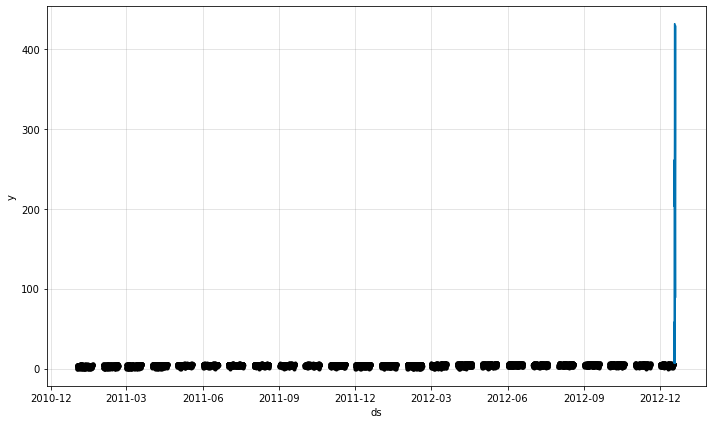

In [88]:
fig1 = m.plot(forecast)

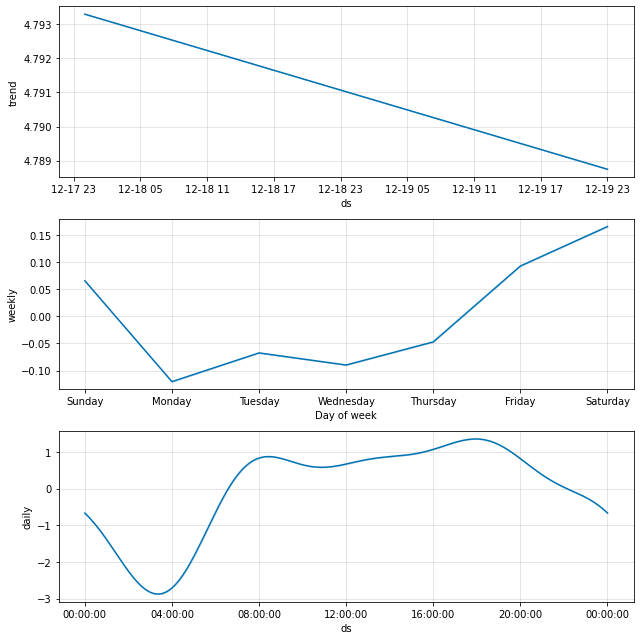

In [89]:
fig2 = m.plot_components(forecast)

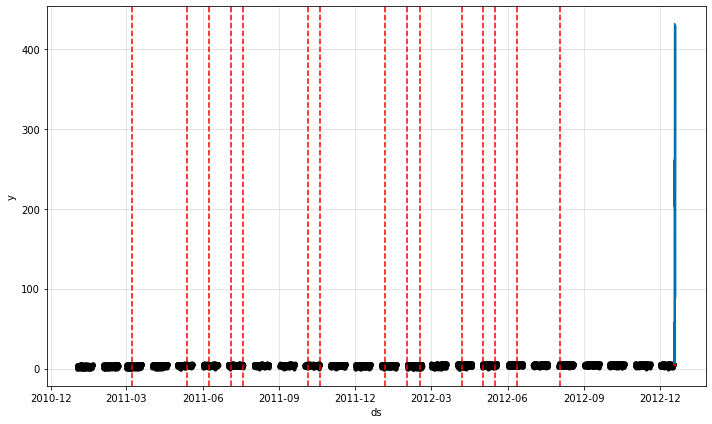

In [90]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)